In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
! pip install -q kaggle

In [3]:
!chmod 600 /root/.kaggle/kaggle.json

In [4]:
!kaggle datasets list -s 'Quora Question Pairs'

ref                                                           title                                                   size  lastUpdated                 downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  ------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
sambit7/first-quora-dataset                                   First Quora Dataset Release: Question Pairs         21854119  2017-02-13 17:56:10.223000           1494         19  0.8235294        
quora/question-pairs-dataset                                  Question Pairs Dataset                              21794834  2017-02-02 01:26:29.210000          14404        259  0.88235295       
elemento/quora-question-pairs                                 Quora Question Pairs                              9347146044  2021-10-06 14:47:15.347000            202          6  0.5882353        
rishisankineni/text-

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [6]:
!kaggle datasets download -d 'quora/question-pairs-dataset'

Dataset URL: https://www.kaggle.com/datasets/quora/question-pairs-dataset
License(s): other
question-pairs-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [7]:
import zipfile
zip_ref=zipfile.ZipFile('/content/question-pairs-dataset.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [8]:
df=pd.read_csv('/content/questions.csv')
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [9]:
new_df=df.sample(30000,random_state=2)

In [10]:
new_df.isnull().sum()

,0
id,0
qid1,0
qid2,0
question1,0
question2,0
is_duplicate,0


In [11]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
339499,339499,665522,665523,Why was Cyrus Mistry removed as the Chairman o...,Why did the Tata Sons sacked Cyrus Mistry?,1
289521,289521,568878,568879,By what age would you think a man should be ma...,When my wrist is extended I feel a shock and b...,0
4665,4665,9325,9326,How would an arbitrageur seek to capitalize gi...,How would an arbitrageur seek to capitalize gi...,0
54203,54203,107861,107862,Why did Quora mark my question as incomplete?,Why does Quora detect my question as an incomp...,1
132566,132566,262554,91499,What is it like working with Pivotal Labs as a...,What's it like to work at Pivotal Labs?,0


In [12]:
new_df.duplicated().sum()

np.int64(0)

is_duplicate
0    18918
1    11082
Name: count, dtype: int64
is_duplicate
0    63.06
1    36.94
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

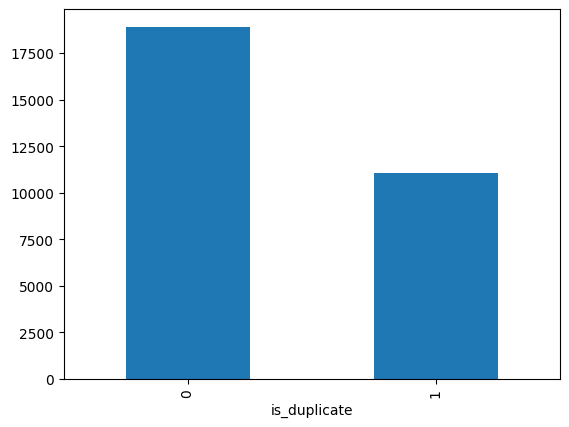

In [13]:
print(new_df['is_duplicate'].value_counts())
print((new_df['is_duplicate'].value_counts()/new_df['is_duplicate'].count())*100)
new_df['is_duplicate'].value_counts().plot(kind='bar')

In [14]:
qid=pd.Series(new_df['qid1'].tolist()+new_df['qid2'].tolist())
print('Numbers of unique question',np.unique(qid).shape[0])
x=qid.value_counts()>1
print('Number of questions that are repeated',x[x].shape[0])

Numbers of unique question 59795
Number of questions that are repeated 176


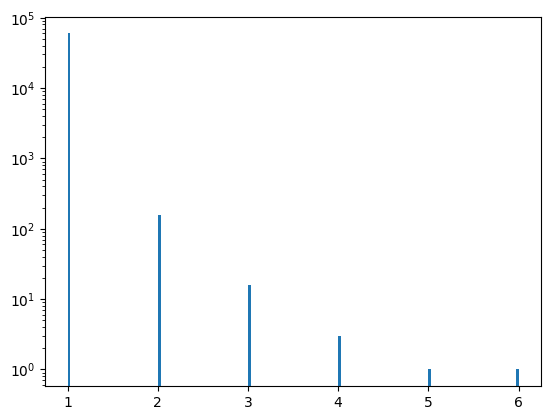

In [15]:
plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

In [16]:
#Feature Engineering
new_df['q1_len']=new_df['question1'].str.len()
new_df['q2_len']=new_df['question2'].str.len()

In [17]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
339499,339499,665522,665523,Why was Cyrus Mistry removed as the Chairman o...,Why did the Tata Sons sacked Cyrus Mistry?,1,58,42
289521,289521,568878,568879,By what age would you think a man should be ma...,When my wrist is extended I feel a shock and b...,0,52,105
4665,4665,9325,9326,How would an arbitrageur seek to capitalize gi...,How would an arbitrageur seek to capitalize gi...,0,125,124
54203,54203,107861,107862,Why did Quora mark my question as incomplete?,Why does Quora detect my question as an incomp...,1,45,60
132566,132566,262554,91499,What is it like working with Pivotal Labs as a...,What's it like to work at Pivotal Labs?,0,54,39


In [18]:
new_df['q1_num_words']=new_df['question1'].apply(lambda row:len(row.split(" ")))
new_df['q2_num_words']=new_df['question2'].apply(lambda row:len(row.split(" ")))
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
339499,339499,665522,665523,Why was Cyrus Mistry removed as the Chairman o...,Why did the Tata Sons sacked Cyrus Mistry?,1,58,42,11,8
289521,289521,568878,568879,By what age would you think a man should be ma...,When my wrist is extended I feel a shock and b...,0,52,105,11,22
4665,4665,9325,9326,How would an arbitrageur seek to capitalize gi...,How would an arbitrageur seek to capitalize gi...,0,125,124,24,24
54203,54203,107861,107862,Why did Quora mark my question as incomplete?,Why does Quora detect my question as an incomp...,1,45,60,8,10
132566,132566,262554,91499,What is it like working with Pivotal Labs as a...,What's it like to work at Pivotal Labs?,0,54,39,11,8


In [19]:
def common_words(row):
  w1=set(map(lambda word:word.lower().strip(),row['question1'].split(" ")))
  w2=set(map(lambda word:word.lower().strip(),row['question2'].split(" ")))
  return len(w1&w2)

In [20]:
new_df['word_common']=new_df.apply(common_words,axis=1)
new_df.head()


,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
339499,339499,665522,665523,Why was Cyrus Mistry removed as the Chairman o...,Why did the Tata Sons sacked Cyrus Mistry?,1,58,42,11,8,4
289521,289521,568878,568879,By what age would you think a man should be ma...,When my wrist is extended I feel a shock and b...,0,52,105,11,22,2
4665,4665,9325,9326,How would an arbitrageur seek to capitalize gi...,How would an arbitrageur seek to capitalize gi...,0,125,124,24,24,20
54203,54203,107861,107862,Why did Quora mark my question as incomplete?,Why does Quora detect my question as an incomp...,1,45,60,8,10,5
132566,132566,262554,91499,What is it like working with Pivotal Labs as a...,What's it like to work at Pivotal Labs?,0,54,39,11,8,3


In [21]:
def total_words(row):
  w1=set(map(lambda word:word.lower().strip(),row['question1'].split(" ")))
  w2=set(map(lambda word:word.lower().strip(),row['question2'].split(" ")))
  return (len(w1)+len(w2))

In [22]:
new_df['total_words']=new_df.apply(total_words,axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,total_words
339499,339499,665522,665523,Why was Cyrus Mistry removed as the Chairman o...,Why did the Tata Sons sacked Cyrus Mistry?,1,58,42,11,8,4,19
289521,289521,568878,568879,By what age would you think a man should be ma...,When my wrist is extended I feel a shock and b...,0,52,105,11,22,2,32
4665,4665,9325,9326,How would an arbitrageur seek to capitalize gi...,How would an arbitrageur seek to capitalize gi...,0,125,124,24,24,20,42
54203,54203,107861,107862,Why did Quora mark my question as incomplete?,Why does Quora detect my question as an incomp...,1,45,60,8,10,5,18
132566,132566,262554,91499,What is it like working with Pivotal Labs as a...,What's it like to work at Pivotal Labs?,0,54,39,11,8,3,19


In [23]:
new_df['word_share']=round(new_df['word_common']/new_df['total_words'],2)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,total_words,word_share
339499,339499,665522,665523,Why was Cyrus Mistry removed as the Chairman o...,Why did the Tata Sons sacked Cyrus Mistry?,1,58,42,11,8,4,19,0.21
289521,289521,568878,568879,By what age would you think a man should be ma...,When my wrist is extended I feel a shock and b...,0,52,105,11,22,2,32,0.06
4665,4665,9325,9326,How would an arbitrageur seek to capitalize gi...,How would an arbitrageur seek to capitalize gi...,0,125,124,24,24,20,42,0.48
54203,54203,107861,107862,Why did Quora mark my question as incomplete?,Why does Quora detect my question as an incomp...,1,45,60,8,10,5,18,0.28
132566,132566,262554,91499,What is it like working with Pivotal Labs as a...,What's it like to work at Pivotal Labs?,0,54,39,11,8,3,19,0.16


maximum character: 332
minimum character: 2
average character: 59.63786666666667


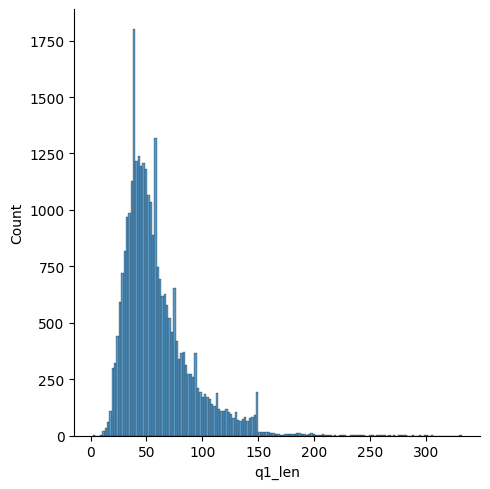

In [24]:
sns.displot(new_df['q1_len'])
print('maximum character:',new_df['q1_len'].max())
print('minimum character:',new_df['q1_len'].min())
print('average character:',new_df['q1_len'].mean())


maximum character: 1151
minimum character: 3
average character: 59.95153333333333


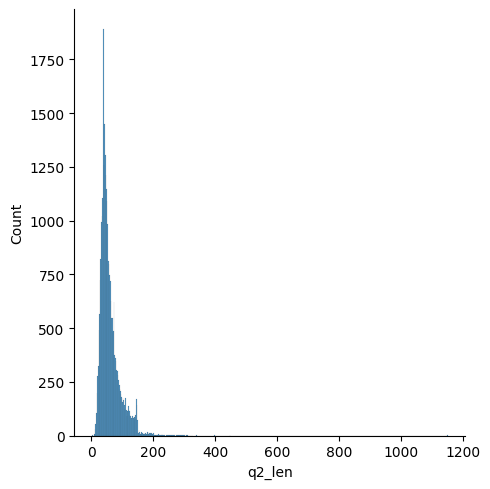

In [25]:
sns.displot(new_df['q2_len'])
print('maximum character:',new_df['q2_len'].max())
print('minimum character:',new_df['q2_len'].min())
print('average character:',new_df['q2_len'].mean())

maximum character: 63
minimum character: 1
average character: 10.9801


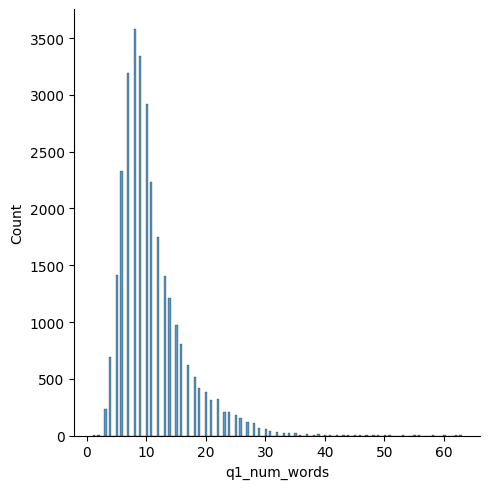

In [26]:
sns.displot(new_df['q1_num_words'])
print('maximum character:',new_df['q1_num_words'].max())
print('minimum character:',new_df['q1_num_words'].min())
print('average character:',new_df['q1_num_words'].mean())


maximum character: 237
minimum character: 1
average character: 11.162733333333334


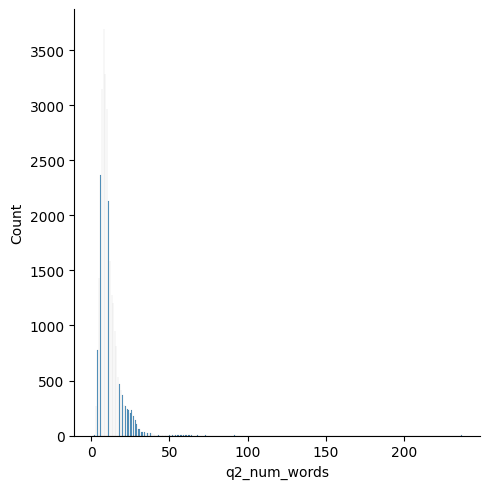

In [27]:
sns.displot(new_df['q2_num_words'])
print('maximum character:',new_df['q2_num_words'].max())
print('minimum character:',new_df['q2_num_words'].min())
print('average character:',new_df['q2_num_words'].mean())

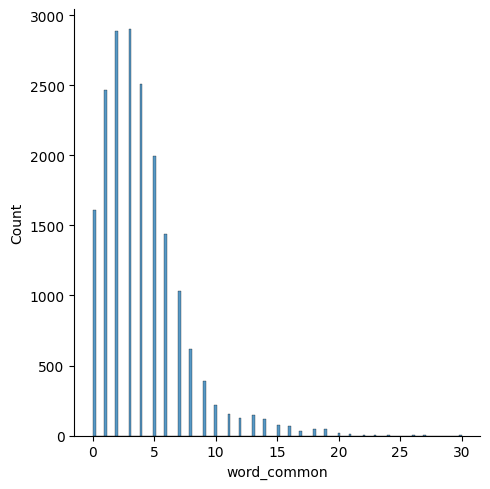

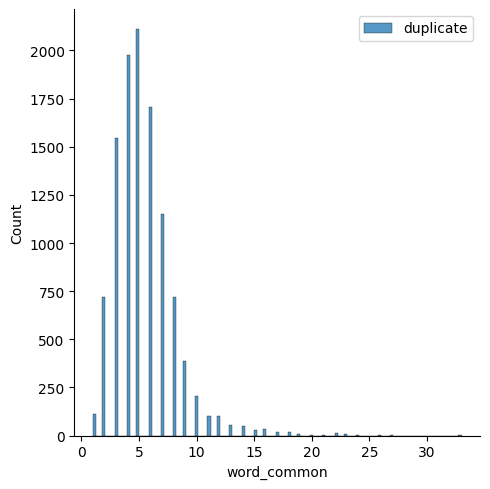

In [29]:
sns.displot(new_df[new_df['is_duplicate']==0]['word_common'],label='non duplicate')
sns.displot(new_df[new_df['is_duplicate']==1]['word_common'],label='duplicate')
plt.legend()
plt.show()

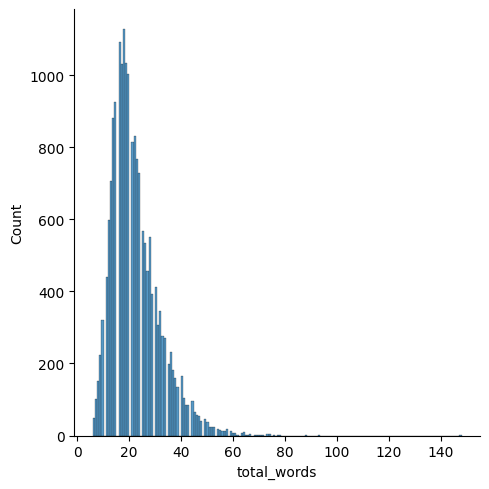

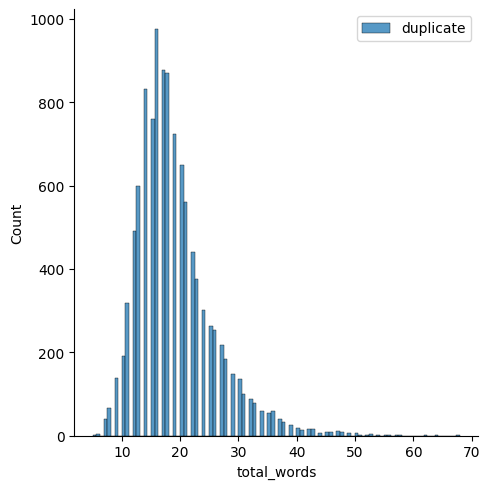

In [30]:
sns.displot(new_df[new_df['is_duplicate']==0]['total_words'],label='non duplicate')
sns.displot(new_df[new_df['is_duplicate']==1]['total_words'],label='duplicate')
plt.legend()
plt.show()

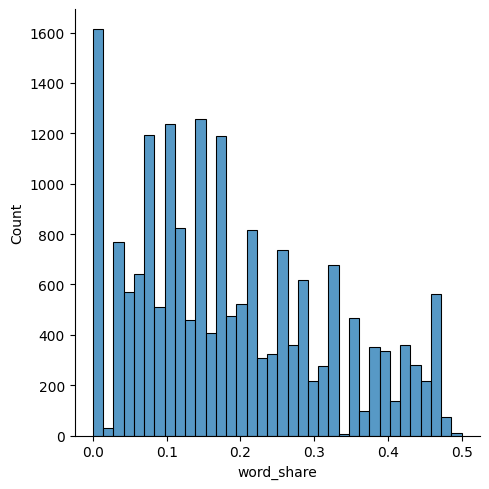

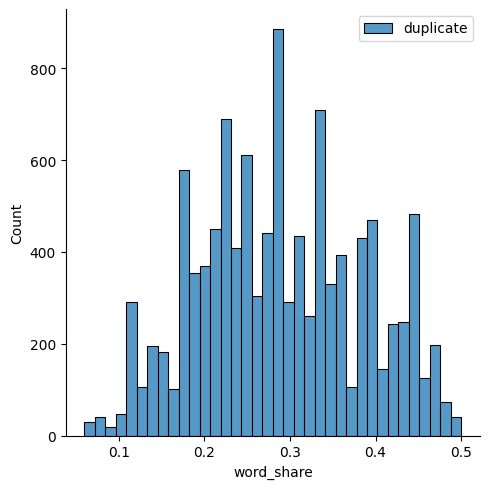

In [32]:
sns.displot(new_df[new_df['is_duplicate']==0]['word_share'],label='non duplicate')
sns.displot(new_df[new_df['is_duplicate']==1]['word_share'],label='duplicate')
plt.legend()
plt.show()

In [33]:
ques_df=new_df[['question1','question2']]
ques_df.head()

,question1,question2
339499,Why was Cyrus Mistry removed as the Chairman o...,Why did the Tata Sons sacked Cyrus Mistry?
289521,By what age would you think a man should be ma...,When my wrist is extended I feel a shock and b...
4665,How would an arbitrageur seek to capitalize gi...,How would an arbitrageur seek to capitalize gi...
54203,Why did Quora mark my question as incomplete?,Why does Quora detect my question as an incomp...
132566,What is it like working with Pivotal Labs as a...,What's it like to work at Pivotal Labs?


In [34]:
final_df=new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(30000, 8)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,total_words,word_share
339499,1,58,42,11,8,4,19,0.21
289521,0,52,105,11,22,2,32,0.06
4665,0,125,124,24,24,20,42,0.48
54203,1,45,60,8,10,5,18,0.28
132566,0,54,39,11,8,3,19,0.16


In [35]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])
cv=CountVectorizer(max_features=3000)
q1_arr,q2_arr=np.vsplit(cv.fit_transform(questions).toarray(),2)

In [36]:
temp1=pd.DataFrame(q1_arr,index=ques_df.index)
temp2=pd.DataFrame(q2_arr,index=ques_df.index)
temp_df=pd.concat([temp1,temp2],axis=1)
temp_df.shape

(30000, 6000)

In [37]:
final_df=pd.concat([final_df,temp_df],axis=1)
print(final_df.shape)
final_df.head()

(30000, 6008)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,total_words,word_share,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
339499,1,58,42,11,8,4,19,0.21,0,0,...,0,0,0,0,0,0,0,0,0,0
289521,0,52,105,11,22,2,32,0.06,0,0,...,0,0,0,0,0,0,0,0,0,0
4665,0,125,124,24,24,20,42,0.48,0,0,...,0,0,0,0,0,0,0,0,0,0
54203,1,45,60,8,10,5,18,0.28,0,0,...,0,0,0,0,0,0,0,0,0,0
132566,0,54,39,11,8,3,19,0.16,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(temp_df.iloc[:,0:-1].values,temp_df.iloc[:,-1].values,test_size=0.2,random_state=1)


In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.9993333333333333

In [40]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
y_pred=xgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.9991666666666666